In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 「House1.bmp」をグレースケール画像として読み込み，表示しなさい．

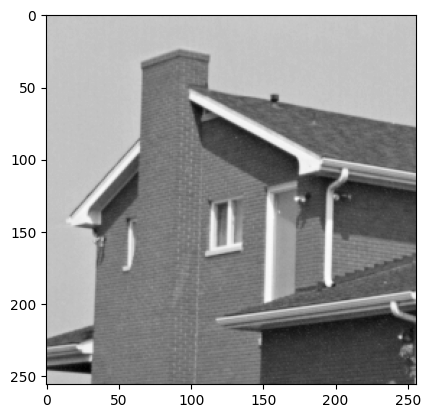

In [2]:
# 画像ファイルの読み込み
image = cv2.imread('grayscale/House1.bmp')

# OpenCVでは画像がBGRで読み込まれるため、グレースケールに変換（表示のため）
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 画像の表示
plt.imshow(image_gray, cmap="gray")

# グレースケール化された「House1.bmp」に対して，閾値127を用いて2値化処理を行い，結果を表示しなさい．

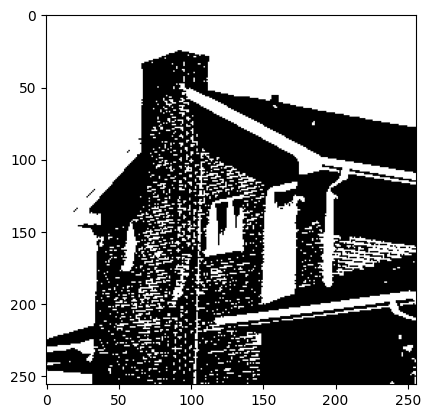

In [3]:
# 画像ファイルの読み込み
image = cv2.imread('grayscale/House1.bmp')

# OpenCVでは画像がBGRで読み込まれるため、グレースケールに変換（表示のため）
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 高さと幅の取得
height, width = image_gray.shape

# 閾値の設定
threshold = 127

# 生成する画像の初期化
image_binary = np.zeros_like(image_gray)

for y in range(height):
    for x in range(width):
        if image_gray[y, x] > threshold:
            image_binary[y][x] = 255 # 閾値より大きいとき255
        else:
            image_binary[y][x] = 0 # 閾値以下のとき0

# 画像の表示
plt.imshow(image_binary, cmap="gray")

# グレースケール化された「House1.bmp」に大津の2値化を適用し，結果を表示しなさい（cv2.threshold関数を利用すること）．

閾値: 146.0


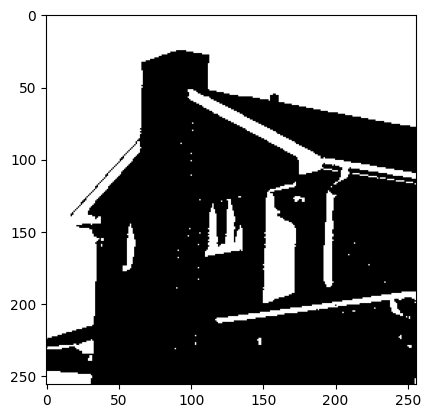

In [4]:
# 画像ファイルの読み込み
image = cv2.imread('grayscale/House1.bmp')

# OpenCVでは画像がBGRで読み込まれるため、グレースケールに変換（表示のため）
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2値化
retval, image_binary = cv2.threshold(image_gray, 127, 255, cv2.THRESH_OTSU)
print(f"閾値: {retval}")

# 画像の表示
plt.imshow(image_binary, cmap="gray")

# 次のマスク画像（mask2.bmp）を利用して，「House1.bmp」にマスク処理を適用し，結果を表示しなさい．

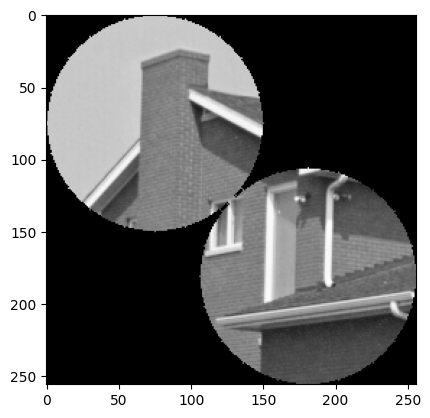

In [5]:
# 画像ファイルの読み込み
image = cv2.imread('grayscale/House1.bmp')

# OpenCVでは画像がBGRで読み込まれるため、グレースケールに変換（表示のため）
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# マスク画像の読み込み
mask = cv2.imread("mask2.bmp")

# OpenCVでは画像がBGRで読み込まれるため、グレースケールに変換（表示のため）
mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# 高さと幅の取得
height, width = image_gray.shape

# 生成する画像の初期化
image_mask = np.zeros_like(image_gray)

for y in range(height):
    for x in range(width):
        if mask_gray[y, x] == 255:
            image_mask[y][x] = image_gray[y][x] # マスク画像が白のとき画像のまま
        else:
            image_mask[y][x] = 0 # マスク画像が黒のとき0

# 画像の表示
plt.imshow(image_mask, cmap="gray")

# 閾値127で2値化された「House1.bmp」に対して，3x3のカーネル[[0, 1, 0], [1, 1, 1], [0, 1, 0]]を用いて膨張処理を行い，結果を表示しなさい．

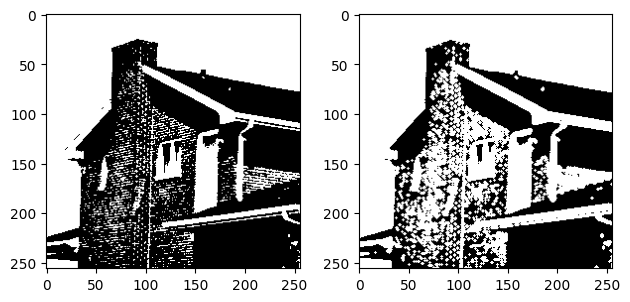

In [6]:
# 画像ファイルの読み込み
image = cv2.imread('grayscale/House1.bmp')

# OpenCVでは画像がBGRで読み込まれるため、グレースケールに変換（表示のため）
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2値化
_, image_binary = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)


# カーネル
kernel = np.array([[0, 1, 0], 
                   [1, 1, 1], 
                   [0, 1, 0]], dtype=np.uint8)

# 膨張処理
image_dilation = cv2.dilate(image_binary, kernel, iterations=1)

# 結果を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_binary, cmap="gray")
axes[1].imshow(image_dilation, cmap="gray")

# 閾値127で2値化された「House1.bmp」に対して，3x3のカーネル[[0, 1, 0], [1, 1, 1], [0, 1, 0]]を用いて縮小処理を行い，結果を表示しなさい．

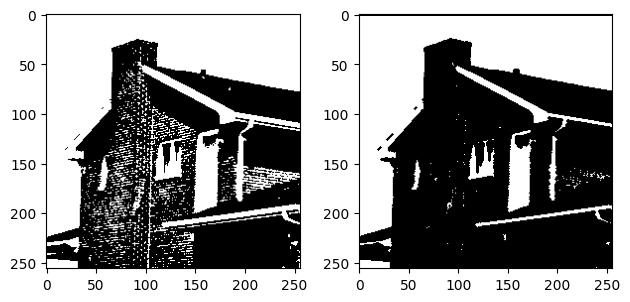

In [7]:
# 画像ファイルの読み込み
image = cv2.imread('grayscale/House1.bmp')

# OpenCVでは画像がBGRで読み込まれるため、グレースケールに変換（表示のため）
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2値化
_, image_binary = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)


# カーネル
kernel = np.array([[0, 1, 0], 
                   [1, 1, 1], 
                   [0, 1, 0]], dtype=np.uint8)

# 縮小処理
image_erosion = cv2.erode(image_binary, kernel, iterations=1)

# 結果を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_binary, cmap="gray")
axes[1].imshow(image_erosion, cmap="gray")

# 閾値127で2値化された「House1.bmp」に対して，3x3のカーネル[[1, 1, 1], [1, 1, 1], [1, 1, 1]]でオープニング処理（縮小2回，膨張2回）を行い，結果を表示しなさい．

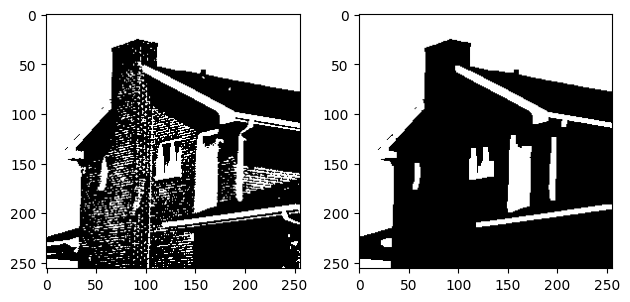

In [8]:
# 画像ファイルの読み込み
image = cv2.imread('grayscale/House1.bmp')

# OpenCVでは画像がBGRで読み込まれるため、グレースケールに変換（表示のため）
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2値化
_, image_binary = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)


# カーネル
kernel = np.array([[1, 1, 1], 
                   [1, 1, 1], 
                   [1, 1, 1]], dtype=np.uint8)

# 縮小処理
image_erosion = cv2.erode(image_binary, kernel, iterations=2)

# 膨張処理
image_dilation = cv2.dilate(image_erosion, kernel, iterations=2)

# 結果を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_binary, cmap="gray")
axes[1].imshow(image_dilation, cmap="gray")

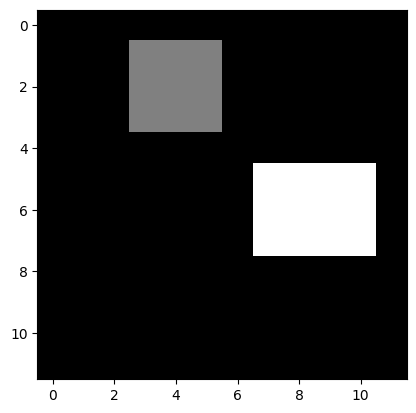

In [9]:
image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 0],
    [0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 0],
    [0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.uint8)

# 関数を利用したラベリング処理
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image)

# 画像の表示
plt.imshow(labels, cmap="gray")

# 上記のラベリング結果において，各ラベルの領域の座標（x座標，y座標），幅，高さ，面積を出力しなさい．

In [10]:
for i in stats:
    x = i[0]
    y = i[1]
    w = i[2]
    h = i[3]
    a = i[4]
    print(f"X:{x} Y:{y} Width:{w} Height:{h} Area:{a}")

X:0 Y:0 Width:12 Height:12 Area:123
X:3 Y:1 Width:3 Height:3 Area:9
X:7 Y:5 Width:4 Height:3 Area:12


# 次の画像データにラベリングを適用し，円に近いかどうかを表す「円形度」を出力しなさい（cv2.findContours関数とcv2.arcLength関数を利用すること）．

X:0 Y:0 Width:12 Height:12 Area:115
X:3 Y:3 Width:7 Height:7 Area:29
[画素数で面積を算出する場合]
面積: 29
円形度: 0.976959422659061
[輪郭線で面積を算出する場合]
面積: 20.0
円形度: 0.6737651190752144


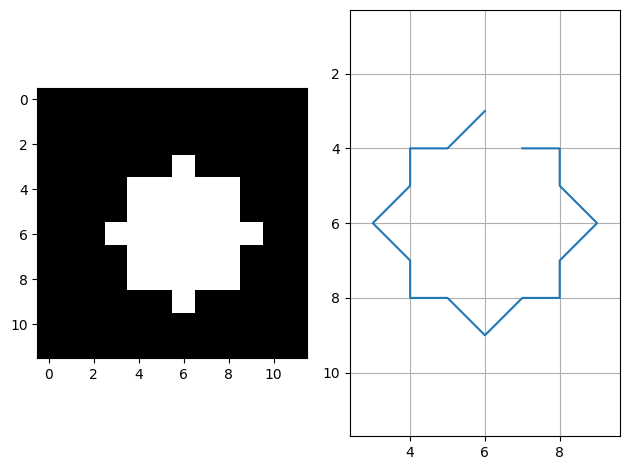

In [74]:
# 12x12の二値画像データ
image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 255, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 255, 255, 255, 0, 0, 0],
    [0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 0, 0, 255, 255, 255, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 255, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.uint8)

# 関数を利用したラベリング処理
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image)
for i in stats:
    x = i[0]
    y = i[1]
    w = i[2]
    h = i[3]
    a = i[4]
    print(f"X:{x} Y:{y} Width:{w} Height:{h} Area:{a}")

# 輪郭を抽出
contours, _ = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
points = contours[0].reshape(-1, 2)

# 輪郭の長さを算出
length = cv2.arcLength(contours[0], True)
#print(length)

print("[画素数で面積を算出する場合]")

# 面積（画素数）
area_pixels = stats[1][4]
print(f"面積: {area_pixels}")

# 円形度（画素数）
circularity = (4 * np.pi * area_pixels) / (length ** 2)
print(f"円形度: {circularity}")

print("[輪郭線で面積を算出する場合]")

# 面積（輪郭線）
area_contours = cv2.contourArea(contours[0])
print(f"面積: {area_contours}")

# 円形度（輪郭線）
circularity = (4 * np.pi * area_contours) / (length ** 2)
print(f"円形度: {circularity}")

# 結果を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image, cmap="gray")
axes[1].plot(points[:,0], points[:,1])
axes[1].axis("equal")
axes[1].grid(True)
axes[1].set_xlim([0, 12])
axes[1].set_ylim([0, 12])
axes[1].invert_yaxis()